In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense,Activation,Flatten
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import seaborn as sns
from sklearn import metrics

In [3]:
df = pd.read_csv('data.csv')
df_originial = pd.read_csv('data.csv')
df = df[df.accuracy >= 75] # Want accurate predictions
df = df[(df.age <= 100) & (df.age>0)]  # No liars
#Check if the age is over 100
df_gender = pd.read_csv('data.csv')
df_gender = df_gender[df_gender.gender == 3]
df = df.iloc[: , 32 : ] # Dont need the questions as they can be considered as indirect independent features as we are predicting humor scores
df_originial= df_originial[df_originial.gender != 3]
df = df[(df.gender != 0) & (df.gender != 3)]
df1 = pd.read_csv('data.csv')

## Grouping the ages

In [3]:
df

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,4.0,3.5,3.0,2.3,25,2,100
1,3.3,3.5,3.3,2.4,44,2,90
2,3.9,3.9,3.1,2.3,50,1,75
3,3.6,4.0,2.9,3.3,30,2,85
4,4.1,4.1,2.9,2.0,52,1,80
...,...,...,...,...,...,...,...
1066,2.5,3.3,2.9,3.0,18,2,95
1067,4.8,3.9,2.5,2.4,31,1,95
1068,4.4,3.9,3.0,4.3,15,1,95
1069,3.1,3.6,2.9,2.8,21,2,87


In [4]:
df['age_groups']= pd.cut(df['age'],bins = [0,18,35,60,np.inf])


## EXPLORATORY DATA ANALYSIS AND DATA PREPARATION
3.2.2 (24%)

In [5]:
# le = preprocessing.LabelEncoder()
# df['age']= le.fit_transform(df['age'])#eNCODED THE AGE INTO 0,1,2,3,4

In [6]:
df_originial.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,...,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,2.022578,3.343368,3.086548,2.835372,3.605833,4.149577,3.285042,2.536218,2.575729,2.869238,...,3.940734,2.765757,2.845720,4.014299,3.374976,2.957103,2.763970,71.309501,1.444026,87.545626
std,1.075081,1.112195,1.166076,1.159660,1.057590,0.981571,1.097263,1.231399,1.221147,1.203739,...,1.137143,1.309344,1.233058,0.706736,0.662071,0.411172,0.645694,1377.141300,0.506474,12.060954
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.300000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,2.900000,2.800000,2.300000,18.000000,1.000000,80.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.400000,3.000000,2.800000,22.000000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.800000,3.300000,3.100000,31.000000,2.000000,95.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,44849.000000,2.000000,100.000000


In [7]:
df_gender

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
137,1,4,2,5,1,5,4,3,3,4,...,5,3,2,3.3,4.3,3.1,3.5,38,3,90
200,2,3,1,3,4,4,1,4,2,3,...,5,2,2,4.5,3.4,2.4,3.1,27,3,72
217,4,5,3,3,4,5,2,4,5,3,...,4,1,2,3.0,3.8,2.6,3.5,20,3,90
474,4,1,2,1,3,5,3,1,4,1,...,4,5,1,2.5,2.3,3.0,1.6,30,3,100
558,1,3,1,1,4,5,3,2,4,4,...,5,3,1,4.3,3.5,3.0,2.4,24,3,95
753,2,4,1,2,1,4,1,1,5,1,...,4,5,1,3.5,3.0,3.6,2.0,24,3,90
826,2,4,3,3,3,4,2,1,1,5,...,5,2,4,4.5,4.0,2.5,2.1,21,3,80
845,3,2,3,3,2,4,2,3,4,2,...,5,3,2,2.6,3.3,2.9,2.6,19,3,80


## Data Visualisation

(39.5, -0.5)

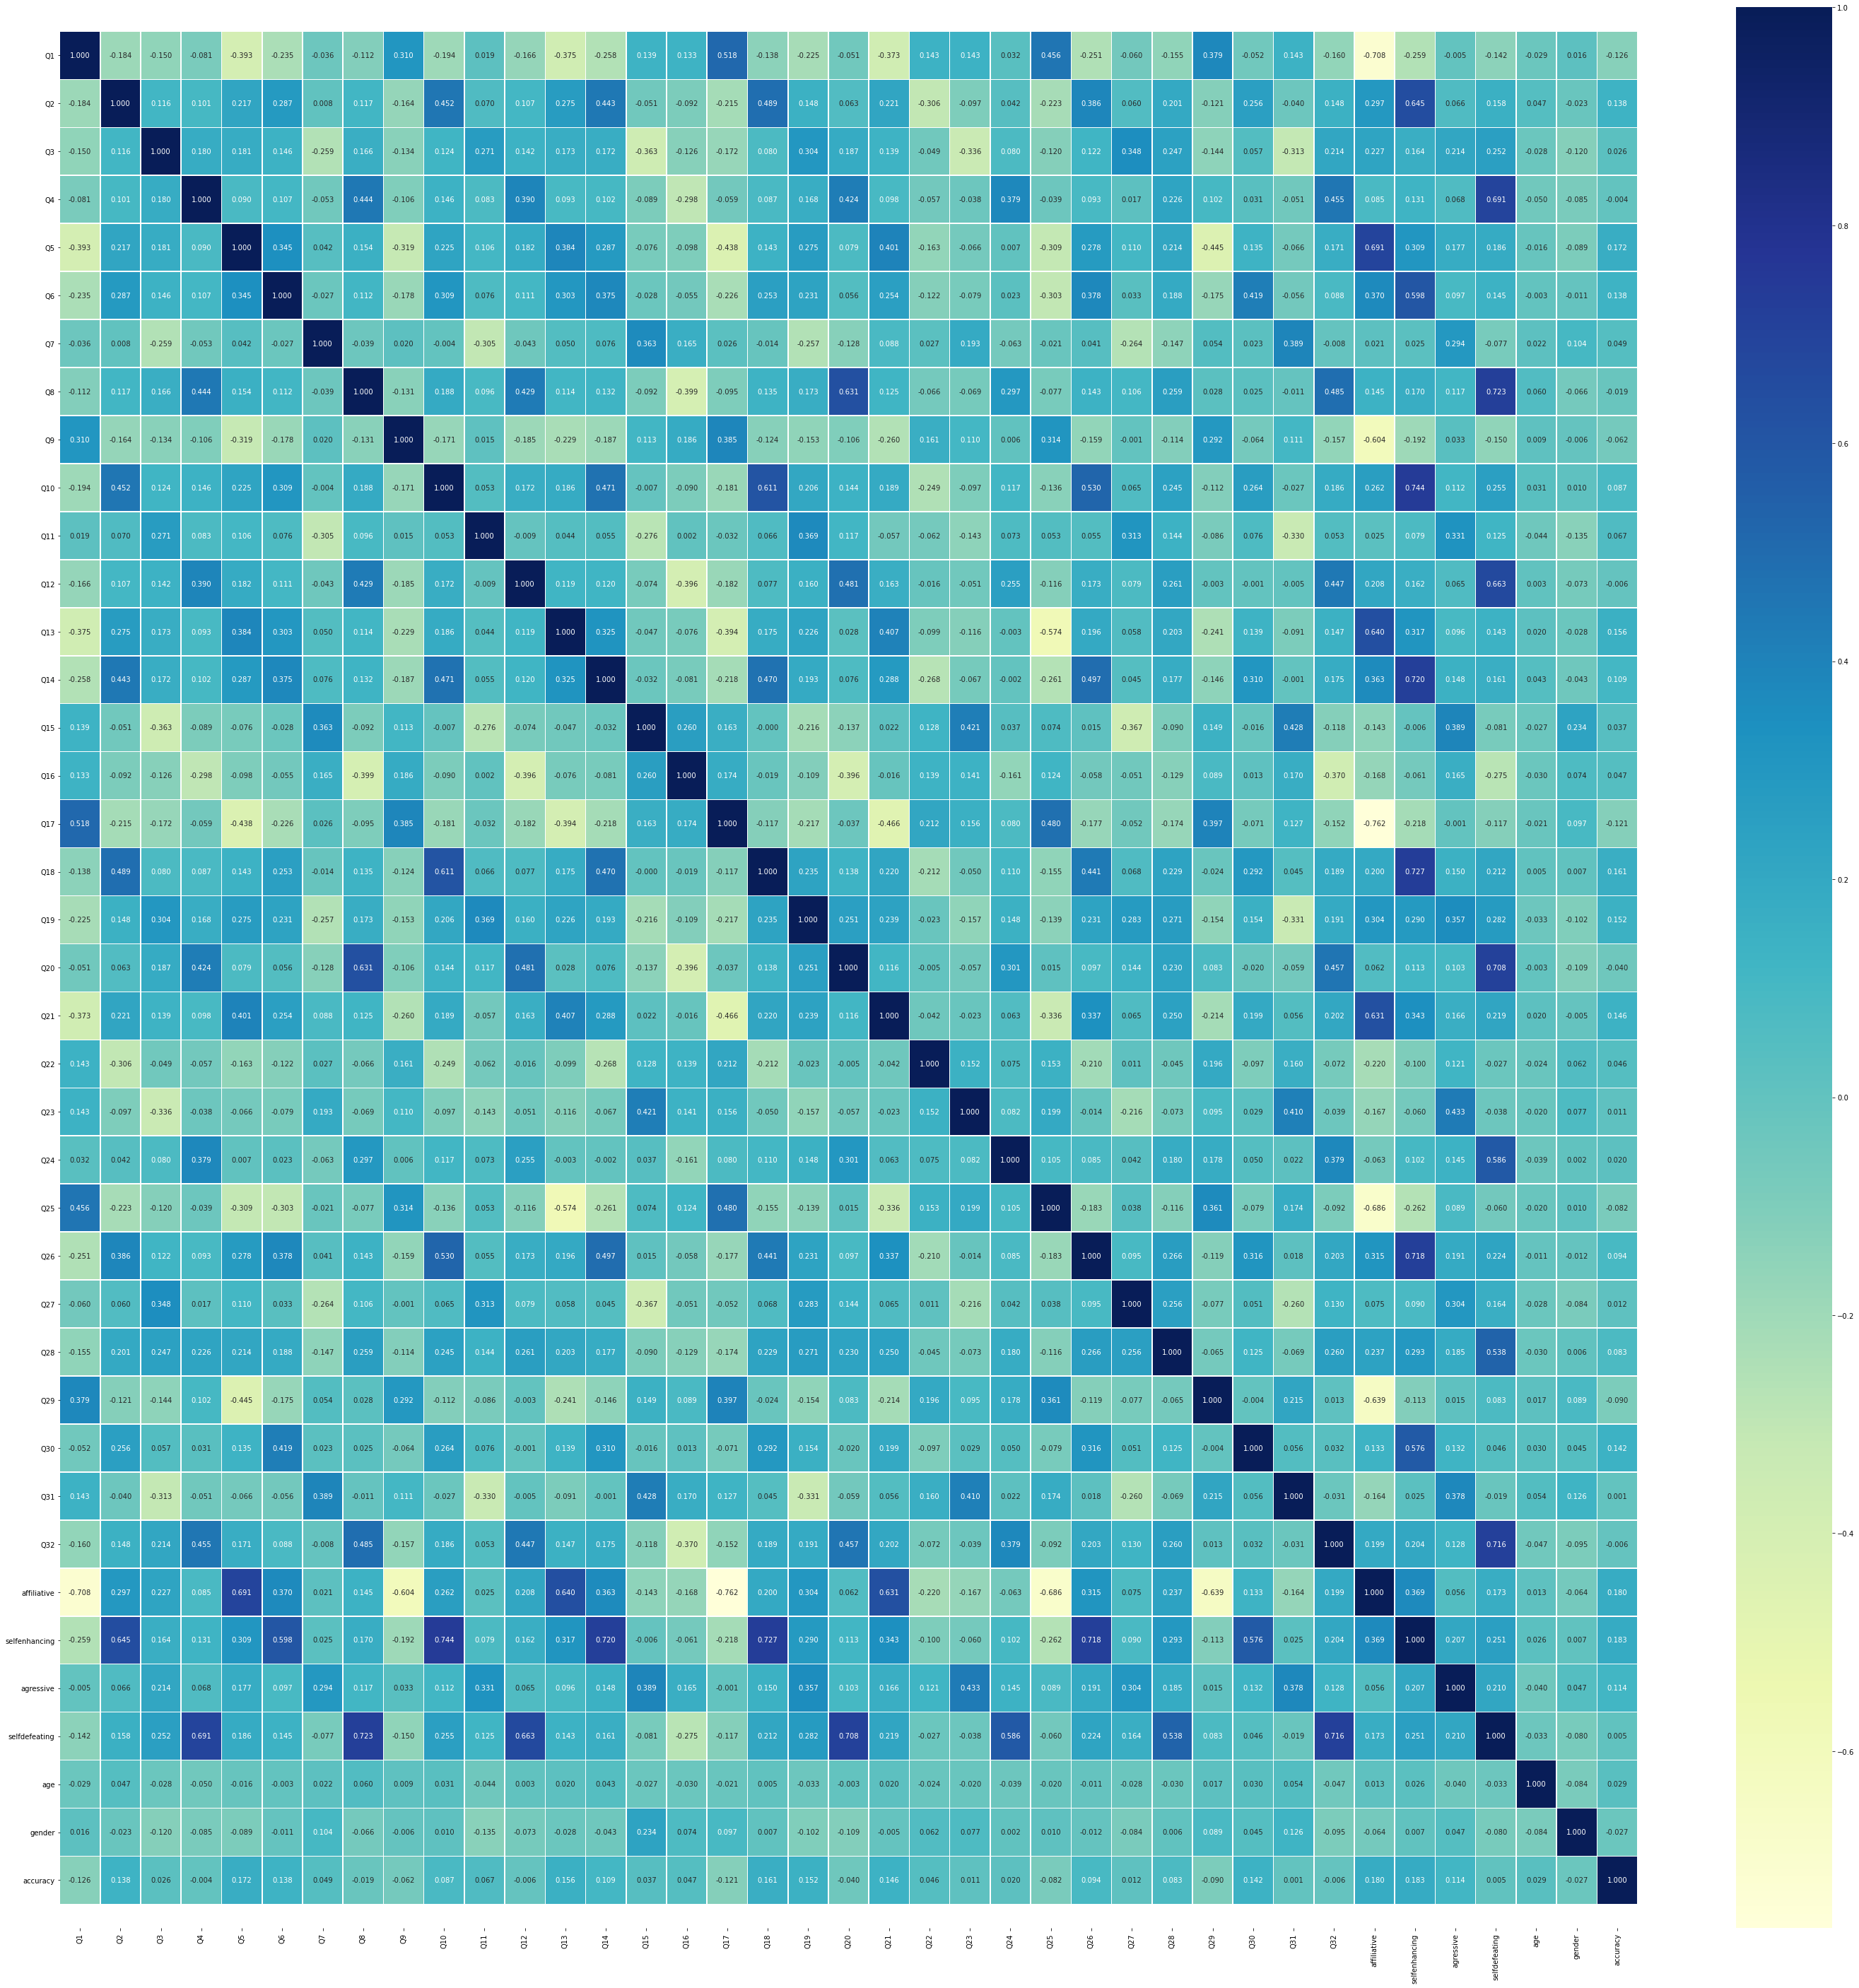

In [5]:
corr_matrix = df1.corr()
fig, ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.6,
                 fmt=".3f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.5, -0.5)

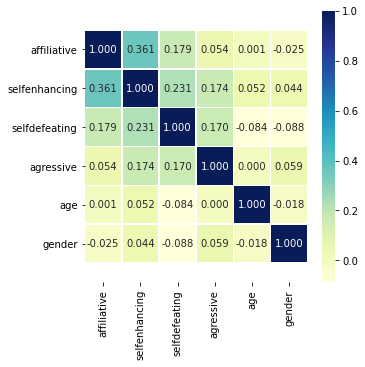

In [9]:
corr_matrix = df[['affiliative','selfenhancing','selfdefeating','agressive','age','gender']].corr()
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.6,
                 fmt=".3f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(7.5, -0.5)

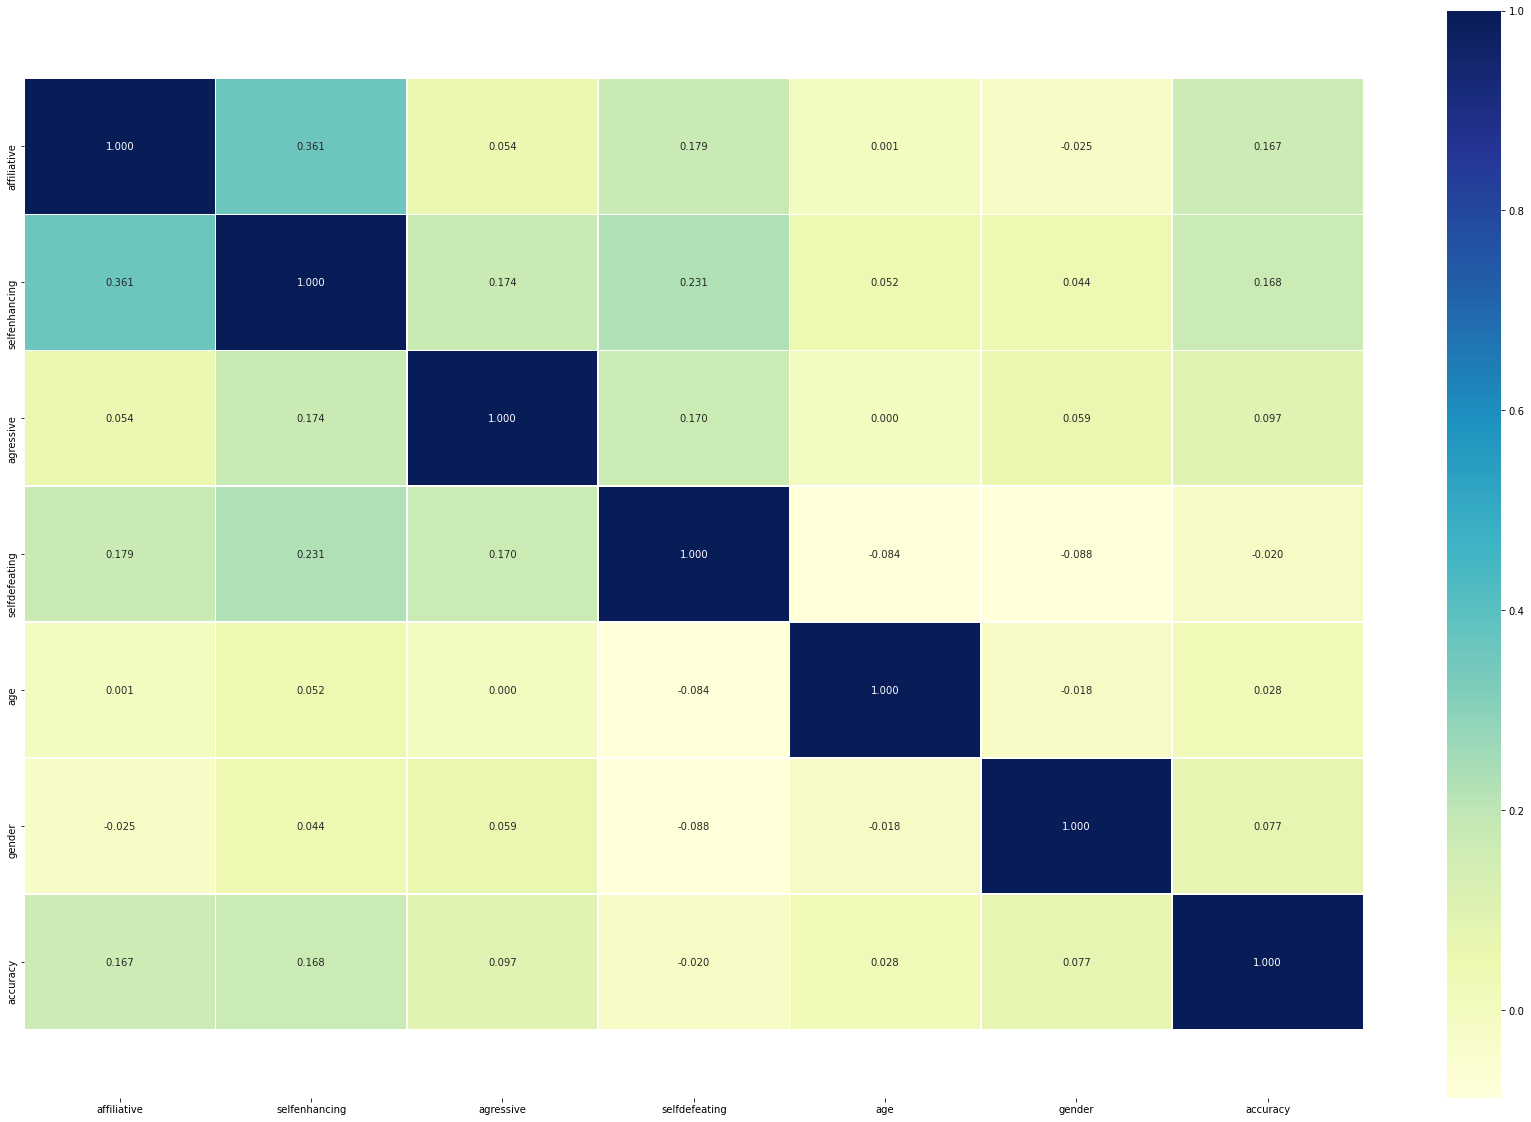

In [10]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.6,
                 fmt=".3f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [11]:
df.describe()

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
count,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000
mean,4.039293,3.386694,2.958628,2.759667,26.457380,1.438669,90.135135
std,0.704006,0.654934,0.394253,0.640836,11.186935,0.496482,7.625770
min,1.300000,1.000000,1.000000,0.900000,14.000000,1.000000,75.000000
25%,3.600000,2.900000,2.800000,2.300000,18.000000,1.000000,85.000000
50%,4.100000,3.500000,3.000000,2.800000,23.000000,1.000000,90.000000
75%,4.500000,3.900000,3.100000,3.100000,31.000000,2.000000,97.000000
max,5.100000,5.000000,5.000000,5.000000,70.000000,2.000000,100.000000


## Test on Regression Models

# 1) Random Forests

## How does age and gender affect the humour of the person

In [13]:
df = df[(df.gender != 3) & (df.gender != 0)]
df['maxno'] = pd.qcut(df["age"],2)

In [14]:
df

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy,age_groups,maxno
0,4.0,3.5,3.0,2.3,25,2,100,"(18.0, 35.0]","(23.0, 70.0]"
1,3.3,3.5,3.3,2.4,44,2,90,"(35.0, 60.0]","(23.0, 70.0]"
2,3.9,3.9,3.1,2.3,50,1,75,"(35.0, 60.0]","(23.0, 70.0]"
3,3.6,4.0,2.9,3.3,30,2,85,"(18.0, 35.0]","(23.0, 70.0]"
4,4.1,4.1,2.9,2.0,52,1,80,"(35.0, 60.0]","(23.0, 70.0]"
...,...,...,...,...,...,...,...,...,...
1066,2.5,3.3,2.9,3.0,18,2,95,"(0.0, 18.0]","(13.999, 23.0]"
1067,4.8,3.9,2.5,2.4,31,1,95,"(18.0, 35.0]","(23.0, 70.0]"
1068,4.4,3.9,3.0,4.3,15,1,95,"(0.0, 18.0]","(13.999, 23.0]"
1069,3.1,3.6,2.9,2.8,21,2,87,"(18.0, 35.0]","(13.999, 23.0]"


In [15]:
Max_value_index = []


for index, row in df.iterrows():
    x = [row['agressive'] ,row['affiliative'], row["selfenhancing"],row['selfdefeating']]

    max_value = max(x)
    if x[0] == max(x):
        agres = 0
        Max_value_index.append(agres)
    elif x[2] == max(x):
        selfe = 0
        Max_value_index.append(selfe)
    elif x[3] == max(x):
        selfd = 0
        Max_value_index.append(selfd)
    elif x[1] == max(x):
        affil = 1
        Max_value_index.append(affil)
#Make a random choice
df["max_value_index"] = Max_value_index


print(df.groupby("maxno")["max_value_index"].value_counts(normalize=True))
print(df.groupby("age")["max_value_index"].value_counts(normalize=True))
print(df.groupby("gender")["selfenhancing"].value_counts(normalize=True))
print(df.groupby("gender")["selfdefeating"].value_counts(normalize=True))
print(df.groupby("gender")["affiliative"].value_counts(normalize=True))
print(df.groupby("gender")["agressive"].value_counts(normalize=True))

maxno           max_value_index
(13.999, 23.0]  1                  0.718690
                0                  0.281310
(23.0, 70.0]    1                  0.749436
                0                  0.250564
Name: max_value_index, dtype: float64
age  max_value_index
14   1                  0.916667
     0                  0.083333
15   1                  0.764706
     0                  0.235294
16   1                  0.677419
                          ...   
68   1                  1.000000
69   0                  0.500000
     1                  0.500000
70   0                  0.500000
     1                  0.500000
Name: max_value_index, Length: 99, dtype: float64
gender  selfenhancing
1       3.5              0.105556
        3.6              0.088889
        3.3              0.072222
        3.8              0.068519
        2.8              0.062963
        3.4              0.061111
        2.9              0.055556
        3.0              0.055556
        3.1              0

In [16]:
Max_value_index_1 = []


for index, row in df.iterrows():
    x = [row['agressive'] ,row['affiliative'], row["selfenhancing"],row['selfdefeating']]

    max_value = max(x)
    if x[0] == max(x):
        agres = 1
        Max_value_index_1.append(agres)
    elif x[2] == max(x):
        selfe = 3
        Max_value_index_1.append(selfe)
    elif x[3] == max(x):
        selfd = 4
        Max_value_index_1.append(selfd)
    elif x[1] == max(x):
        affil = 2
        Max_value_index_1.append(affil)
#Make a random choice
df["max_value_index1"] = Max_value_index_1

In [17]:
df

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy,age_groups,maxno,max_value_index,max_value_index1
0,4.0,3.5,3.0,2.3,25,2,100,"(18.0, 35.0]","(23.0, 70.0]",1,2
1,3.3,3.5,3.3,2.4,44,2,90,"(35.0, 60.0]","(23.0, 70.0]",0,3
2,3.9,3.9,3.1,2.3,50,1,75,"(35.0, 60.0]","(23.0, 70.0]",0,3
3,3.6,4.0,2.9,3.3,30,2,85,"(18.0, 35.0]","(23.0, 70.0]",0,3
4,4.1,4.1,2.9,2.0,52,1,80,"(35.0, 60.0]","(23.0, 70.0]",0,3
...,...,...,...,...,...,...,...,...,...,...,...
1066,2.5,3.3,2.9,3.0,18,2,95,"(0.0, 18.0]","(13.999, 23.0]",0,3
1067,4.8,3.9,2.5,2.4,31,1,95,"(18.0, 35.0]","(23.0, 70.0]",1,2
1068,4.4,3.9,3.0,4.3,15,1,95,"(0.0, 18.0]","(13.999, 23.0]",1,2
1069,3.1,3.6,2.9,2.8,21,2,87,"(18.0, 35.0]","(13.999, 23.0]",0,3


In [19]:
df_max = df[df.max_value_index == 0]
df_max.describe()

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy,max_value_index,max_value_index1
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.0,257.000000
mean,3.316342,3.540078,3.036576,2.829183,26.505837,1.470817,89.832685,0.0,2.770428
std,0.708738,0.759464,0.440952,0.747525,11.867142,0.500122,7.793679,0.0,0.954953
min,1.300000,1.300000,1.800000,1.000000,14.000000,1.000000,75.000000,0.0,1.000000
25%,2.900000,3.000000,2.800000,2.300000,18.000000,1.000000,85.000000,0.0,3.000000
50%,3.400000,3.600000,3.000000,2.800000,22.000000,1.000000,90.000000,0.0,3.000000
75%,3.900000,4.100000,3.300000,3.400000,31.000000,2.000000,98.000000,0.0,3.000000
max,4.600000,5.000000,5.000000,5.000000,70.000000,2.000000,100.000000,0.0,4.000000


In [20]:
df_max1 = df[df.max_value_index == 1]
df_max1.describe()

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy,max_value_index,max_value_index1
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.0,705.0
mean,4.302837,3.330780,2.930213,2.734326,26.439716,1.426950,90.245390,1.0,2.0
std,0.483263,0.603378,0.372084,0.595806,10.937171,0.494986,7.566237,0.0,0.0
min,2.800000,1.000000,1.000000,0.900000,14.000000,1.000000,75.000000,1.0,2.0
25%,4.000000,2.900000,2.800000,2.400000,19.000000,1.000000,85.000000,1.0,2.0
50%,4.400000,3.400000,2.900000,2.800000,23.000000,1.000000,90.000000,1.0,2.0
75%,4.600000,3.800000,3.100000,3.100000,31.000000,2.000000,97.000000,1.0,2.0
max,5.100000,4.600000,4.000000,4.500000,70.000000,2.000000,100.000000,1.0,2.0


    ## Data visulaisation

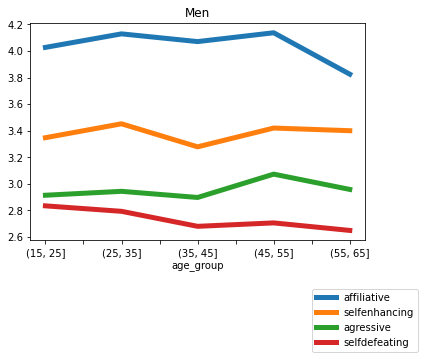

In [21]:
import pylab

bins = np.arange(df.age.min()+1, df.age.max()+1, 10)
df['age_group'] = pd.Series(pd.cut(df['age'], bins=bins))

age = df[df['gender'] == 1].groupby('age_group').mean()

age[['affiliative', 'selfenhancing','agressive', 'selfdefeating']].plot(linewidth=5)

plt.title('Men')
pylab.legend(loc=9, bbox_to_anchor=(1, -.2))

<AxesSubplot:xlabel='gender', ylabel='age'>

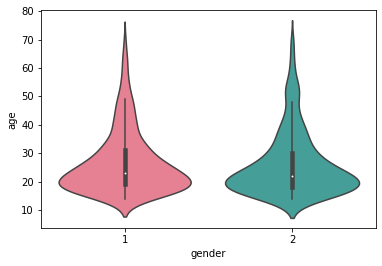

In [22]:
sns.violinplot(x="gender", y="age", data=df, palette="husl", split=True)

<AxesSubplot:xlabel='gender', ylabel='age'>

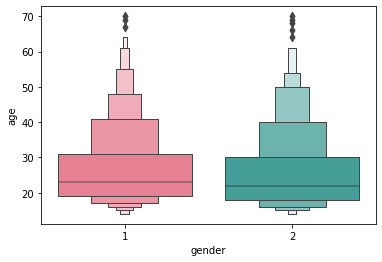

In [23]:
sns.boxenplot(x="gender", y="age", data=df, palette="husl")

<AxesSubplot:xlabel='age', ylabel='Density'>

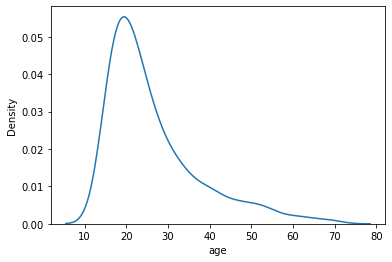

In [24]:
sns.kdeplot(df.age)

<AxesSubplot:ylabel='gender'>

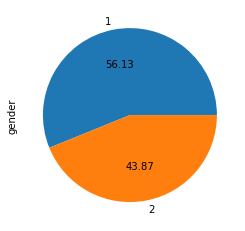

In [25]:
df['gender'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='gender'>

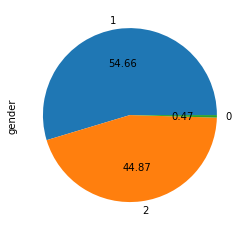

In [26]:
df_originial['gender'].value_counts().plot(kind='pie',autopct='%.2f')

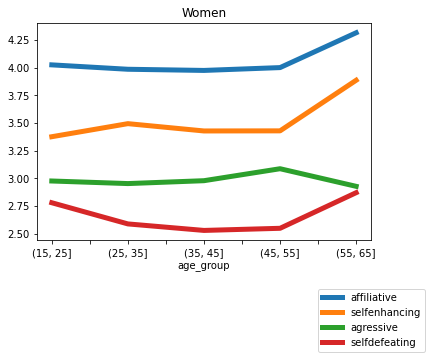

In [27]:
bins = np.arange(df.age.min()+1, df.age.max()+1, 10)
df['age_group'] = pd.Series(pd.cut(df['age'], bins=bins))

age = df[df['gender'] == 2].groupby('age_group').mean()

age[['affiliative', 'selfenhancing','agressive', 'selfdefeating']].plot(linewidth=5)

plt.title('Women')
pylab.legend(loc=9, bbox_to_anchor=(1, -.2))

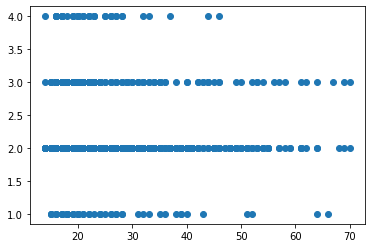

In [302]:
plt.scatter(df['age'],df['max_value_index1'])
plt.show()

In [389]:
df_selfd = df[df.max_value_index1 == 4 ]
df_selfd.describe()

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy,max_value_index,max_value_index1
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.0
mean,3.325581,3.034884,3.000000,3.751163,22.837209,1.418605,88.976744,0.0,4.0
std,0.629850,0.492749,0.310146,0.444743,7.074199,0.499169,7.817832,0.0,0.0
min,1.900000,2.000000,2.300000,2.600000,14.000000,1.000000,75.000000,0.0,4.0
25%,2.950000,2.800000,2.800000,3.500000,17.500000,1.000000,81.500000,0.0,4.0
50%,3.300000,2.900000,3.000000,3.900000,21.000000,1.000000,90.000000,0.0,4.0
75%,3.800000,3.500000,3.100000,4.000000,26.000000,2.000000,95.000000,0.0,4.0
max,4.400000,4.000000,3.600000,4.500000,46.000000,2.000000,100.000000,0.0,4.0


In [386]:
df_aff = df[df.max_value_index1 == 2 ]
df_aff.describe()

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy,max_value_index,max_value_index1
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.0,705.0
mean,4.302837,3.330780,2.930213,2.734326,26.439716,1.426950,90.245390,1.0,2.0
std,0.483263,0.603378,0.372084,0.595806,10.937171,0.494986,7.566237,0.0,0.0
min,2.800000,1.000000,1.000000,0.900000,14.000000,1.000000,75.000000,1.0,2.0
25%,4.000000,2.900000,2.800000,2.400000,19.000000,1.000000,85.000000,1.0,2.0
50%,4.400000,3.400000,2.900000,2.800000,23.000000,1.000000,90.000000,1.0,2.0
75%,4.600000,3.800000,3.100000,3.100000,31.000000,2.000000,97.000000,1.0,2.0
max,5.100000,4.600000,4.000000,4.500000,70.000000,2.000000,100.000000,1.0,2.0


In [390]:
df_agg = df[df.max_value_index1 == 1]
df_agg.describe()

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy,max_value_index,max_value_index1
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,51.0
mean,2.737255,2.711765,3.321569,2.392157,26.568627,1.450980,89.549020,0.0,1.0
std,0.573048,0.586736,0.475527,0.610850,12.081813,0.502543,7.242413,0.0,0.0
min,1.400000,1.300000,2.500000,1.000000,15.000000,1.000000,75.000000,0.0,1.0
25%,2.400000,2.300000,3.000000,2.000000,18.000000,1.000000,85.000000,0.0,1.0
50%,2.800000,2.800000,3.300000,2.300000,22.000000,1.000000,90.000000,0.0,1.0
75%,3.100000,3.000000,3.500000,2.600000,31.500000,2.000000,95.000000,0.0,1.0
max,4.100000,4.000000,5.000000,4.000000,66.000000,2.000000,100.000000,0.0,1.0


In [388]:
df_selfe = df[df.max_value_index1 == 3 ]
df_selfe.describe()

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy,max_value_index,max_value_index1
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.0,163.0
mean,3.495092,3.932515,2.957055,2.722699,27.453988,1.490798,90.147239,0.0,3.0
std,0.672181,0.550968,0.424550,0.647626,12.650673,0.501456,7.976999,0.0,0.0
min,1.300000,2.100000,1.800000,1.000000,14.000000,1.000000,75.000000,0.0,3.0
25%,3.100000,3.600000,2.600000,2.300000,18.500000,1.000000,84.500000,0.0,3.0
50%,3.500000,4.000000,2.900000,2.600000,22.000000,1.000000,90.000000,0.0,3.0
75%,4.000000,4.400000,3.300000,3.100000,32.000000,2.000000,98.000000,0.0,3.0
max,4.600000,5.000000,4.000000,5.000000,70.000000,2.000000,100.000000,0.0,3.0


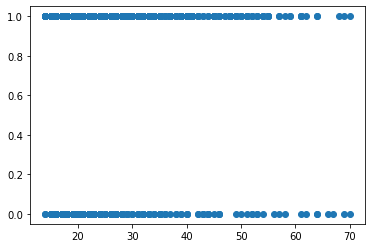

In [222]:
plt.scatter(df['age'],df['max_value_index'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='max_value_index'>

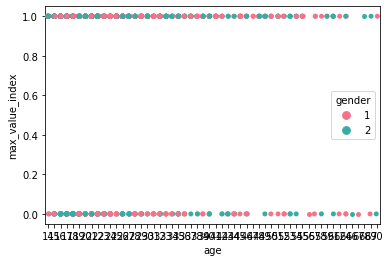

In [223]:
sns.stripplot(x="age", y="max_value_index", hue="gender", data=df, palette="husl")

<AxesSubplot:xlabel='max_value_index', ylabel='age'>

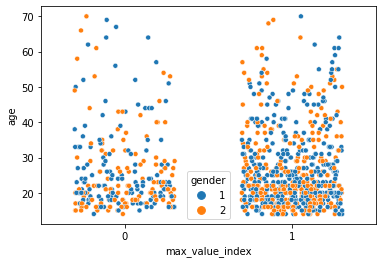

In [224]:
sns.stripplot(x = "max_value_index", y = "age", hue = "gender", data = df, jitter = 0.3, linewidth = 0.5, edgecolor = 'white')

<AxesSubplot:xlabel='gender', ylabel='age'>

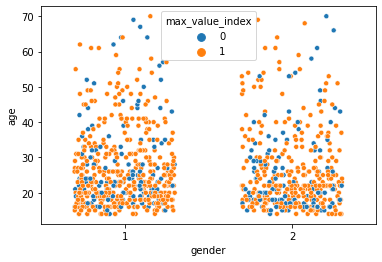

In [225]:
sns.stripplot(x = "gender", y = "age", hue = "max_value_index", data = df, jitter = 0.3, linewidth = 0.5, edgecolor = 'white')

<AxesSubplot:xlabel='max_value_index', ylabel='age'>

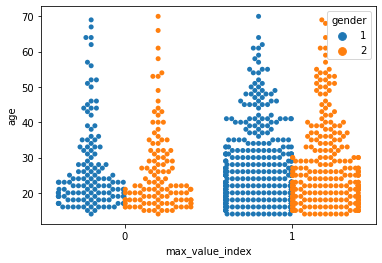

In [226]:
sns.swarmplot(x = "max_value_index", y = "age", hue = "gender", data = df, dodge = True)

<AxesSubplot:xlabel='max_value_index', ylabel='age'>

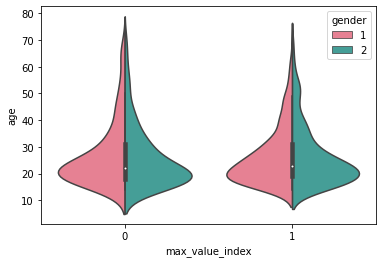

In [227]:
sns.violinplot(x="max_value_index", y="age", hue="gender", data=df, palette="husl", split=True)

<AxesSubplot:xlabel='max_value_index', ylabel='age'>

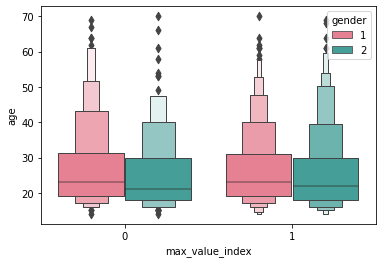

In [228]:
sns.boxenplot(x="max_value_index", y="age", hue="gender", data=df, palette="husl")

# Logistic regression
## Softmax


In [609]:
from sklearn.linear_model import LogisticRegression
input_val =  df[['age','gender']]
output_val = df[['max_value_index']]

input_val_train,input_val_test,output_val_train,output_val_test = train_test_split(input_val,output_val,test_size=0.3)

In [480]:
input_val_train

,age,gender
750,19,2
954,16,1
376,28,1
180,19,1
575,55,2
...,...,...
574,66,2
238,64,1
919,48,2
972,16,2


In [481]:
output_val

,max_value_index
0,1
1,0
2,0
3,0
4,0
...,...
1066,0
1067,1
1068,1
1069,0


In [482]:
df.max_value_index.value_counts(normalize=True)

1    0.732848
0    0.267152
Name: max_value_index, dtype: float64

In [595]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
input_val_sm, output_val_sm = sm.fit_resample(input_val, output_val)
input_val_train, input_val_test, output_val_train, output_val_test = train_test_split(input_val_sm, output_val_sm,
                                                                                      test_size=0.3)

## Using Class Weights on SOftmax Regression

In [470]:
# Oversampling
# class_weight = dict({0:95})

model3 = LogisticRegression()
model3.fit(input_val_train,output_val_train)

LogisticRegression()

In [471]:
predictions = model3.predict(input_val_test)
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [472]:
from collections import Counter
from sklearn.datasets import *
from imblearn.over_sampling import RandomOverSampler

In [473]:
output_val_train.value_counts()

max_value_index
1                  510
0                  477
dtype: int64

In [474]:
print(metrics.confusion_matrix(output_val_test,predictions))
print(metrics.classification_report(output_val_test,predictions,digits=3))

[[ 36 192]
 [ 28 167]]
              precision    recall  f1-score   support

           0      0.562     0.158     0.247       228
           1      0.465     0.856     0.603       195

    accuracy                          0.480       423
   macro avg      0.514     0.507     0.425       423
weighted avg      0.518     0.480     0.411       423



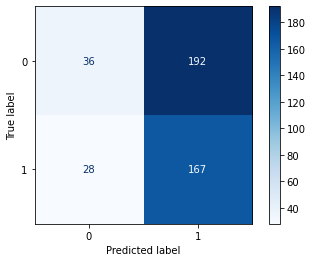

In [475]:
plot_confusion_matrix(model3,input_val_test,output_val_test,cmap='Blues',display_labels=['0','1'])

## Hyperparamter Tuning

In [511]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=70, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model3, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(input_val_train, output_val_train)

In [512]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.503832 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.501791 (0.118018) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.501791 (0.118018) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.501791 (0.118018) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.501791 (0.118018) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.501791 (0.118018) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.502132 (0.118321) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.501111 (0.117820) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.501111 (0.117820) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.501451 (0.117920) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.497392 (0.116653) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.497392 (0.116653) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.499728 (0.119663) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.488594 (0.117252) wi

In [513]:
predict1 = grid_result.predict(input_val_test)
print(metrics.confusion_matrix(output_val_test,predict1))
print(metrics.classification_report(output_val_test,predict1,digits=3))

[[120  87]
 [117  99]]
              precision    recall  f1-score   support

           0      0.506     0.580     0.541       207
           1      0.532     0.458     0.493       216

    accuracy                          0.518       423
   macro avg      0.519     0.519     0.517       423
weighted avg      0.520     0.518     0.516       423



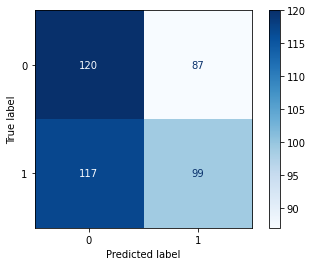

In [515]:
plot_confusion_matrix(grid_result,input_val_test,output_val_test,cmap='Blues')
pred_prob = grid_result.predict_proba(input_val_test)
pred_prob

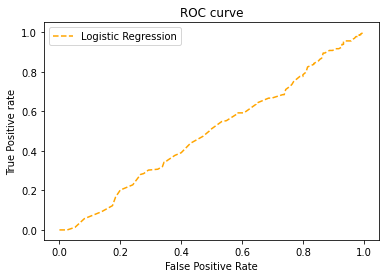

In [579]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, treshold = roc_curve(output_val_test, pred_prob[:,1],pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## Random forest classifier

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [243]:
classifier = RandomForestClassifier(n_estimators=1000)

In [244]:
classifier.fit(input_val_train,output_val_train)

RandomForestClassifier(n_estimators=1000)

In [245]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [246]:
predict = classifier.predict(input_val_test)
predict

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,

## Evaluation

In [247]:
print(metrics.confusion_matrix(output_val_test,predict))
print(metrics.classification_report(output_val_test,predict,digits=3))

[[141  72]
 [108 102]]
              precision    recall  f1-score   support

           0      0.566     0.662     0.610       213
           1      0.586     0.486     0.531       210

    accuracy                          0.574       423
   macro avg      0.576     0.574     0.571       423
weighted avg      0.576     0.574     0.571       423



## Using Oversampling for all Models

In [526]:
from imblearn.over_sampling import SMOTE

In [610]:
sm = SMOTE()
input_val_sm, output_val_sm = sm.fit_resample(input_val, output_val)

In [611]:
input_val_train,input_val_test,output_val_train,output_val_test = train_test_split(input_val_sm,output_val_sm,test_size=0.3)

In [529]:
classifier.fit(input_val_train,output_val_train)

RandomForestClassifier(n_estimators=1000)

In [530]:
predict = classifier.predict(input_val_test)
predict= pd.DataFrame(predict)
predict.value_counts()

0    251
1    172
dtype: int64

In [531]:
print(metrics.confusion_matrix(output_val_test,predict))
print(metrics.classification_report(output_val_test,predict,digits=3))

[[130  65]
 [121 107]]
              precision    recall  f1-score   support

           0      0.518     0.667     0.583       195
           1      0.622     0.469     0.535       228

    accuracy                          0.560       423
   macro avg      0.570     0.568     0.559       423
weighted avg      0.574     0.560     0.557       423



## Hyperparameter Tuning

In [532]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(classifier.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## Random Hyperparameter Grid and   Random Search Training

In [534]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


## Random Search Training

In [535]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(input_val_train,output_val_train )

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=1000),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [536]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

## Grid Search CV

In [537]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [10, 12, 14],
    'n_estimators': [300, 400, 500, 1000]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [538]:
grid_search.fit(input_val_train, output_val_train)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': True,
 'max_depth': 80,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [539]:
predict1 = grid_search.predict(input_val_test)
predict1= pd.DataFrame(predict1)
predict1.value_counts()

0    230
1    193
dtype: int64

In [540]:
print(metrics.confusion_matrix(output_val_test,predict1))
print(metrics.classification_report(output_val_test,predict1,digits=3))

[[123  72]
 [107 121]]
              precision    recall  f1-score   support

           0      0.535     0.631     0.579       195
           1      0.627     0.531     0.575       228

    accuracy                          0.577       423
   macro avg      0.581     0.581     0.577       423
weighted avg      0.584     0.577     0.577       423



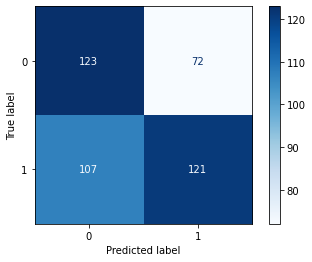

In [541]:
plot_confusion_matrix(grid_search,input_val_test,output_val_test,cmap='Blues',)

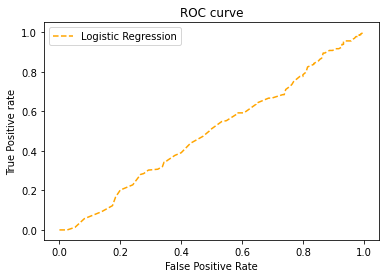

In [580]:
pred_prob1 = grid_search.predict_proba(input_val_test)
pred_prob1

fpr2, tpr2, treshold2 = roc_curve(output_val_test, pred_prob1[:,1],pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## XGBboost

In [575]:
from xgboost import XGBClassifier
import xgboost as xgb

In [612]:
model_3 = XGBClassifier(n_estimators = 1000)
model_3.fit(input_val_train,output_val_train)# Already done with oversampling

[06:35:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [613]:
y_predict_2=model_3.predict(input_val_test)
print(metrics.confusion_matrix(output_val_test,y_predict_2))
print(metrics.classification_report(output_val_test,y_predict_2,digits=3))

[[117  85]
 [110 111]]
              precision    recall  f1-score   support

           0      0.515     0.579     0.545       202
           1      0.566     0.502     0.532       221

    accuracy                          0.539       423
   macro avg      0.541     0.541     0.539       423
weighted avg      0.542     0.539     0.539       423



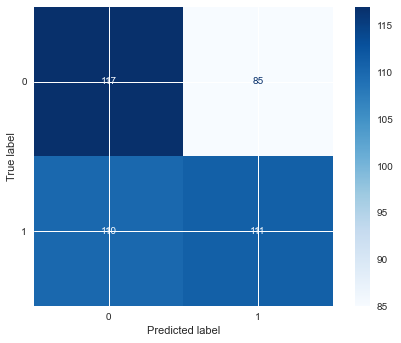

In [615]:
plot_confusion_matrix(model_3,input_val_test,output_val_test,cmap='Blues')

## Hyperparameter Tuning of XGB boost

In [593]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [608]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=5, scoring="f1-score")

# Fit
_ = grid_cv.fit(input_val_train, output_val_train)

ValueError: 'f1-score' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [605]:
grid_cv.best_score_

0.5207557811618726

In [598]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [599]:
# Insert the new fixed values to the grid
param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

# Give new value ranges to other params
param_grid["gamma"] = [3, 5, 7]
param_grid["max_depth"] = [9, 15, 20]
param_grid["reg_lambda"] = [10, 30, 50]
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]

In [600]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid,
                         cv=5, scoring="roc_auc", n_jobs=-1)

_ = grid_cv_2.fit(input_val_train, output_val_train)

[06:21:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [555]:
grid_cv_2.best_params_

{'colsample_bytree': 0.5,
 'gamma': 3,
 'learning_rate': 0.5,
 'max_depth': 9,
 'reg_lambda': 10,
 'scale_pos_weight': 3,
 'subsample': 0.8}

In [556]:
grid_cv_2.best_score_

0.5615982241953384

In [590]:
final = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

In [591]:
final.fit(input_val_train,output_val_train)
# final =XGBClassifier('colsample_bytree': 0.5,'gamma': 0,'learning_rate': 0.1,'max_depth': 7,'reg_lambda': 0,'scale_pos_weight': 3,'subsample': 0.8})


[06:15:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=0,
              scale_pos_weight=3, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [592]:
y_predict_3=final.predict(input_val_test)
print(metrics.confusion_matrix(output_val_test,y_predict_3))
print(metrics.classification_report(output_val_test,y_predict_3,digits=3))

[[ 10 185]
 [  3 225]]
              precision    recall  f1-score   support

           0      0.769     0.051     0.096       195
           1      0.549     0.987     0.705       228

    accuracy                          0.556       423
   macro avg      0.659     0.519     0.401       423
weighted avg      0.650     0.556     0.425       423



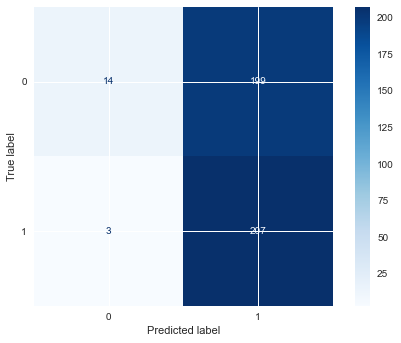

In [601]:
plot_confusion_matrix(final,input_val_test,output_val_test,cmap='Blues')

In [269]:
y_predict_best=model_best.predict(input_val_test)
print(metrics.confusion_matrix(output_val_test,y_predict_best))
print(metrics.classification_report(output_val_test,y_predict_best,digits=3))

[[216   0]
 [207   0]]
              precision    recall  f1-score   support

           0      0.511     1.000     0.676       216
           1      0.000     0.000     0.000       207

    accuracy                          0.511       423
   macro avg      0.255     0.500     0.338       423
weighted avg      0.261     0.511     0.345       423



#### SVM


In [270]:
from sklearn import svm

In [271]:
# class_weight = dict({0:2.45})

model_4 = svm.SVC()
model_4.fit(input_val_train,output_val_train)

SVC()

In [272]:
y_pred=model_4.predict(input_val_test)
y_pred= pd.DataFrame(y_pred)
y_pred.value_counts()

0    256
1    167
dtype: int64

In [273]:
model_4.score(input_val_test,output_val_test)

0.48936170212765956

In [274]:
print(metrics.confusion_matrix(output_val_test,y_pred))
print(metrics.classification_report(output_val_test,y_pred,digits=3))

[[128  88]
 [128  79]]
              precision    recall  f1-score   support

           0      0.500     0.593     0.542       216
           1      0.473     0.382     0.422       207

    accuracy                          0.489       423
   macro avg      0.487     0.487     0.482       423
weighted avg      0.487     0.489     0.484       423



In [339]:
df.describe()

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
count,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000
mean,4.039293,3.386694,2.958628,2.759667,26.457380,1.438669,90.135135
std,0.704006,0.654934,0.394253,0.640836,11.186935,0.496482,7.625770
min,1.300000,1.000000,1.000000,0.900000,14.000000,1.000000,75.000000
25%,3.600000,2.900000,2.800000,2.300000,18.000000,1.000000,85.000000
50%,4.100000,3.500000,3.000000,2.800000,23.000000,1.000000,90.000000
75%,4.500000,3.900000,3.100000,3.100000,31.000000,2.000000,97.000000
max,5.100000,5.000000,5.000000,5.000000,70.000000,2.000000,100.000000


In [341]:
df

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,4.0,3.5,3.0,2.3,25,2,100
1,3.3,3.5,3.3,2.4,44,2,90
2,3.9,3.9,3.1,2.3,50,1,75
3,3.6,4.0,2.9,3.3,30,2,85
4,4.1,4.1,2.9,2.0,52,1,80
...,...,...,...,...,...,...,...
1066,2.5,3.3,2.9,3.0,18,2,95
1067,4.8,3.9,2.5,2.4,31,1,95
1068,4.4,3.9,3.0,4.3,15,1,95
1069,3.1,3.6,2.9,2.8,21,2,87


In [394]:
type(input_val_sm)

pandas.core.frame.DataFrame

In [581]:
# predict probabilities
pred_prob1 = grid_result.predict_proba(input_val_test)
pred_prob2 = grid_search.predict_proba(input_val_test)
pred_prob3 = model_3.predict_proba(input_val_test)

In [584]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(output_val_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(output_val_test, pred_prob2[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(output_val_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(output_val_test))]
p_fpr, p_tpr, _ = roc_curve(output_val_test, random_probs, pos_label=1)

In [586]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(output_val_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(output_val_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(output_val_test, pred_prob3[:,1])
print(auc_score1, auc_score2,auc_score3)

0.46857849752586594 0.5794646873594242 0.5823324336482232


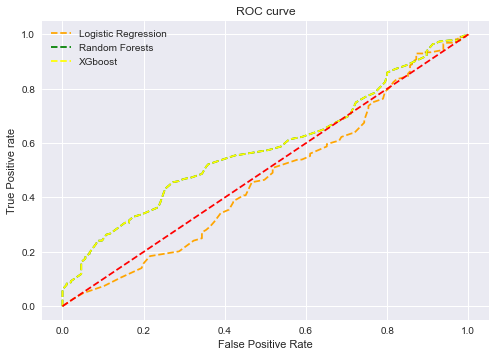

In [589]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forests')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='XGboost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [54]:
x = df_originial.loc[:, df_originial.columns != 'max_value_index']
y = df['max_value_index']

In [55]:
x = x.drop(['age_groups','maxno','age_group'],axis = 1)

KeyError: "['age_groups' 'maxno' 'age_group'] not found in axis"

In [56]:
df_originial

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,3,2,3,3,2,5,3,2,3,4,...,4,4,4,2.5,3.3,2.9,3.0,18,2,95
1067,1,4,5,2,4,4,1,2,2,5,...,4,1,2,4.8,3.9,2.5,2.4,31,1,95
1068,1,4,4,5,4,4,3,5,4,3,...,4,1,5,4.4,3.9,3.0,4.3,15,1,95
1069,3,4,4,3,3,4,3,2,4,3,...,4,3,3,3.1,3.6,2.9,2.8,21,2,87


In [57]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1066    0
1067    1
1068    1
1069    0
1070    1
Name: max_value_index, Length: 962, dtype: int64

In [58]:
x = df.loc[:, df.columns != 'max_value_index']
y = df['max_value_index']

In [65]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [66]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(x, y)

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [63]:
selector.get_feature_names_out(input_features=None)

NameError: name 'selector' is not defined